In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime


In [2]:
import db_api
DB_FILE = "statistics_server.db"

conn = db_api.create_connection(DB_FILE)
packet_data = db_api.db_fetch_packet_data(conn)
prob_data = db_api.db_fetch_packet_data(conn,'prob_packet')
assoc_data = db_api.db_fetch_packet_data(conn,'association_packet')
print len(packet_data)
#print packet_data[183807]

524923


### Find unique appearences of association requests per day and number of vendors

oles oi mac addresses


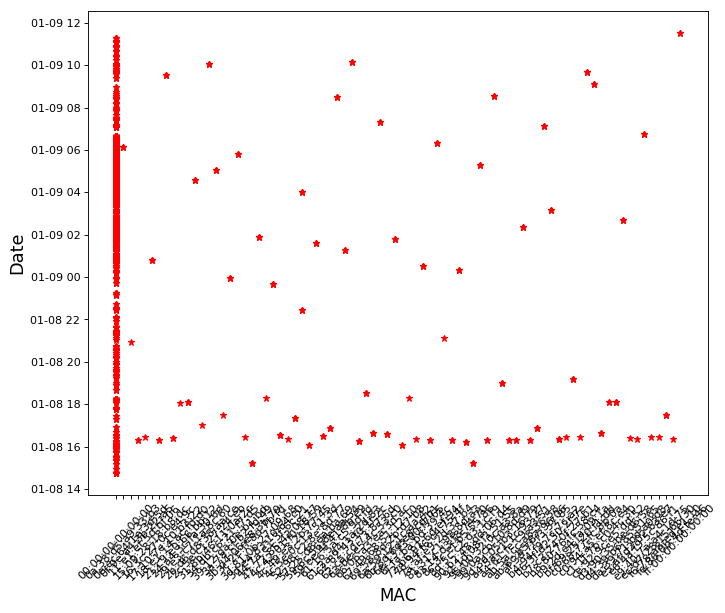

set([u'90:b2:48:dd:06:d4', u'66:06:a3:ea:3d:ac', u'2b:d6:d8:38:aa:ce', u'69:58:8d:2b:d7:b8', u'9d:3d:05:b3:16:79', u'c0:68:77:fc:8b:0a', u'81:31:c1:98:8d:a3', u'17:10:7e:10:b3:22', u'0f:9e:a4:3b:22:a5', u'47:72:85:42:08:77', u'6a:59:12:1c:aa:42', u'0a:38:d5:a9:33:b3', u'3d:e4:83:10:64:c0', u'24:a4:3c:fa:30:6d', u'8c:3c:ef:b5:55:86', u'f6:78:a8:ed:e1:10', u'bf:69:25:20:f1:dd', u'57:25:d8:ea:ba:69', u'7a:af:e9:2d:37:b4', u'3d:81:0b:27:09:68', u'00:00:00:00:00:00', u'99:0a:cb:10:8d:d9', u'29:e3:c7:1a:8c:60', u'c1:1f:7b:c0:4c:30', u'39:12:da:0e:b1:bd', u'78:94:f6:c4:75:4f', u'ce:92:9c:e5:dd:52', u'16:3c:27:0c:e4:9c', u'b8:80:76:fc:58:c4', u'4c:42:01:f0:18:59', u'e9:40:7a:a4:1d:75', u'95:00:32:0c:a3:8a', u'18:e1:14:ac:fd:d0', u'61:16:5a:c5:9d:fd', u'21:c9:e0:66:bb:12', u'e5:af:d2:02:63:e7', u'6f:fa:ba:bd:39:4c', u'11:e1:ef:5d:bf:06', u'6e:13:f3:00:f7:65', u'da:39:71:bd:a0:d8', u'8d:5c:c2:d3:1c:f9', u'b6:3f:d2:30:2f:7e', u'59:ee:4f:41:8b:e9', u'3a:7a:cf:b2:fd:49', u'a4:61:fe:c9:a3:51', u'63:

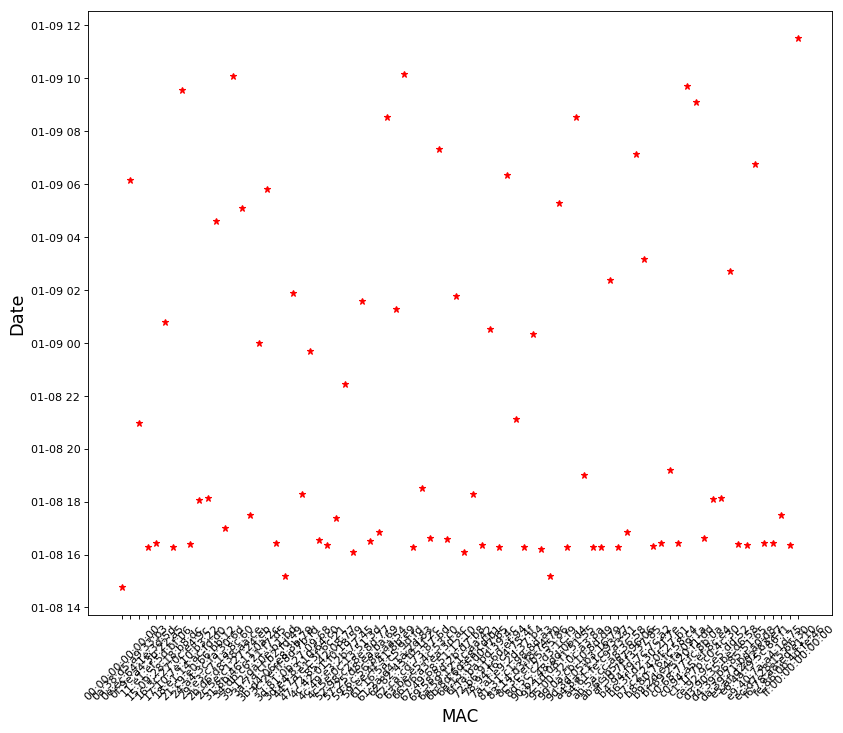

In [6]:
import db_api
import datetime as dt
import numpy as np
DB_FILE = "statistics.db"

conn = db_api.create_connection(DB_FILE)
assoc_data = db_api.db_fetch_packet_data(conn,'association_packet')

#filters out the old macs
after_8 = [] #list of packets after 8th of month
for pkt in assoc_data:
    if int(pkt[5]) > 1515000000 : #unix timestamp after 8th of month
        after_8.append(pkt)

#adding to a list macs and timestamps for presenting them later  
timestamps = []
macs = []
for pkt in after_8: #assoc_data:
    
    macs.append(pkt[1])
    timestamps.append(pkt[5])

print "oles oi mac addresses"

fig = plt.figure(figsize=(10,8),dpi=80)
ax1 = plt.subplot2grid((1,1), (0,0))
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(timestamps)

ax1.plot(macs,date,'r*')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("MAC",fontsize=15)
plt.ylabel('Date',fontsize=16)
plt.show()




#-------------------------- unique macs --------------------------------------
unique_macs = []
uniques = []
for pkt in after_8:
    if pkt[1] not in unique_macs:
        unique_macs.append(pkt[1])
        uniques.append(pkt)

#adding to a list macs and timestamps for presenting them later  
timestamps = []
macs = []
for pkt in uniques: #assoc_data:
    #print pkt
    macs.append(pkt[1])
    timestamps.append(pkt[5])
print set(macs)
print "synolikes unique mac addresses",len(macs)       
print "monadikes mac addresses"

fig = plt.figure(figsize=(12,10),dpi=80)
ax1 = plt.subplot2grid((1,1), (0,0))
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(timestamps)

ax1.plot(macs,date,'r*')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("MAC",fontsize=15)
plt.ylabel('Date',fontsize=16)
plt.show()

###  <span style="color:chocolate">Y: number of assoc requests per mac, X: timeslices, colors:'MAC' </span> 


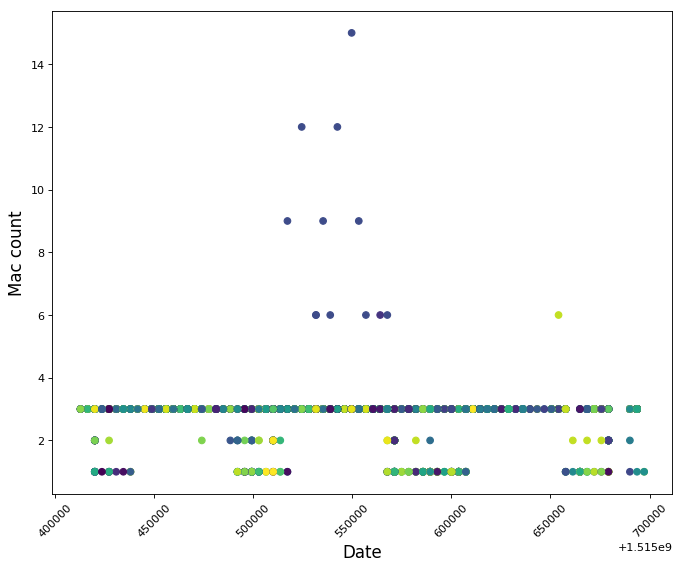

In [13]:
import db_api
import datetime as dt
import numpy as np
DB_FILE = "statistics.db"
EIGHTH_1 = 1515412894

def mac_to_color(macs_list): #maps a list of mac to integers for using them later as colors
    macs = [mac[0] for mac in macs_list]
    uniques =  set(macs)
    i = 0
    m_dict = {}
    
    for mac in uniques:
        m_dict[mac] = i
        i += 1
    return m_dict

def occurenses_per_mac(macs_list):
    m_dict = {}
    
    macs = [mac[0] for mac in macs_list]
    uniques =  set(macs)
    
    for mac in uniques:
        m_dict[mac] = 0
        
    for mac in uniques:
        for m in macs:
            if m == mac:
                m_dict[mac] += 1
    return m_dict
                
def mac_count_per_slice(tp_start,mac_ts):
    """ Creates a dictionary of timesteps and counts the appearance of assoc requests"""
    count = tp_start
    timesteps = []
    t_s = {} # key= timestep, value = sum of appearances of macs in timestep
    timestamps = [m_ts[1] for m_ts in mac_ts ]
    while count <= timestamps[-1]:
        timesteps.append(count)
        t_s[count] = []
        count += 3600
    
    #Create a dict timesteps as keys and macs-timestamps as values
    for timestep in timesteps:
        for mac_t in mac_ts:
            if mac_t[1] >= timestep and mac_t[1] <= (timestep+3600):
                if timestep not in t_s:
                    t_s[timestep] = [mac_t]
                else:
                    t_s[timestep].append(mac_t)
                    
    ts_count_mac = []
    for key in t_s:
        m_dict = occurenses_per_mac(t_s[key])
        for k in m_dict:
            ts_count_mac.append([key, m_dict[k],k]) 

    return ts_count_mac


conn = db_api.create_connection(DB_FILE)
assoc_data = db_api.db_fetch_packet_data(conn,'association_packet')
##@@!!@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2
# Thelw edw na kanw draw thn kathe mac me diaforetiko xroma kai na parakolouthw th poria ths sunartish tou xronou
# se timeslices. dld emfanisthke 15 fores to misawro. Axonas y plithos emfanisewn, X misawra slices, X xrwma - ID
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#filters out the old macs
after_8 = [] #list of packets after 8th of month
for pkt in assoc_data:
    if int(pkt[5]) > EIGHTH_1 : #unix timestamp after 8th of month
        after_8.append(pkt)
        
#adding to a dict macs and timestamps for presenting them later  
mac_ts = [] # a list of [mac,timestamp]
for pkt in after_8[:10000]: #assoc_data:
    mac_ts.append([pkt[3],pkt[5]]) # 3 app to connect, 1 mac

m_tocolor = mac_to_color(mac_ts)
#print m_tocolor
x = []
y = []
z = []
for element in mac_count_per_slice(EIGHTH_1,mac_ts):
    x.append(element[0])
    y.append(element[1])
    z.append(m_tocolor[element[2]])
#print z
#des an mpainei edw gui. na exeis mpara me mikra megala timeslices ta opoia tha allazei dunamika h grafikh.

#draw figure
fig = plt.figure(figsize=(10,8),dpi=80)
ax1 = plt.subplot2grid((1,1), (0,0))
#dateconv = np.vectorize(dt.datetime.fromtimestamp)
#date = dateconv(x)
date = map( dt.datetime.fromtimestamp , x )

ax1.scatter(x,y,c=z,s=35)
#ax1.plot(date,y,'mo')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("Date",fontsize=15)
plt.ylabel('Mac count',fontsize=15)
plt.show()

###  <span style="color:magenta">Y: assoc requests, X: timeslices </span> 

assoc requests per timeslice


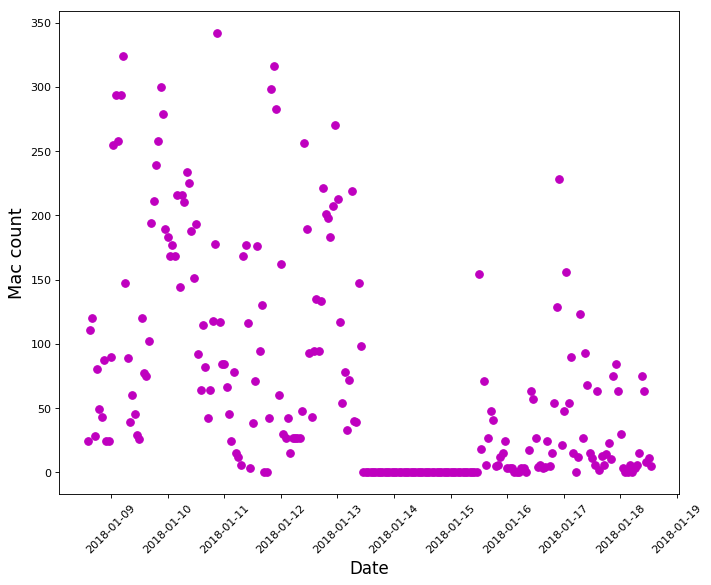

In [6]:
import db_api
import datetime as dt
import numpy as np
DB_FILE = "statistics.db"
EIGHTH_1 = 1515412894

def mac_count_per_slice(tp_start,timestamps):
    """ Creates a dictionary of timesteps and counts the appearance of assoc requests"""
    count = tp_start
    timesteps = []
    t_s = {} # key= timestep, value = sum of appearances of macs in timestep
    
    while count <= timestamps[-1]:
        timesteps.append(count)
        t_s[count] = 0
        count += 3600
    
    
    for timestep in timesteps:
        for timestamp in timestamps:
            if timestamp >= timestep and timestamp <= (timestep+3600):
                t_s[timestep] += 1
    return t_s

conn = db_api.create_connection(DB_FILE)
assoc_data = db_api.db_fetch_packet_data(conn,'association_packet')

#filters out the old macs
after_8 = [] #list of packets after 8th of month
for pkt in assoc_data:
    if int(pkt[5]) > EIGHTH_1 : #unix timestamp after 8th of month
        after_8.append(pkt)

#adding to a list macs and timestamps for presenting them later  
timestamps = []
macs = []
for pkt in after_8: #assoc_data:
    macs.append(pkt[3]) #[1] mac, [3] destination
    timestamps.append(pkt[5])

print "assoc requests per timeslice"
ts_slices = mac_count_per_slice(EIGHTH_1, timestamps)

#draw figure
fig = plt.figure(figsize=(10,8),dpi=80)
ax1 = plt.subplot2grid((1,1), (0,0))
#dateconv = np.vectorize(dt.datetime.fromtimestamp)
#date = dateconv(ts_slices.keys())
date = map( dt.datetime.fromtimestamp , ts_slices.keys() )

ax1.plot(date,ts_slices.values(),'mo',markersize=6.8)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("Date",fontsize=15)
plt.ylabel('Mac count',fontsize=16)
plt.show()


### Vendors by Date

set([u'Ubiquiti', u'XiaomiCo', u'Apple', u'00:00:00', None, u'Routerbo'])
synolikoi vendors 2508
monadikoi vendors


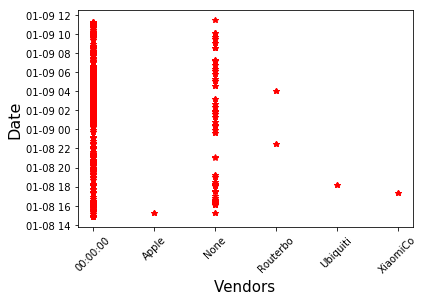

In [7]:
unique_vendors = []
uniques = []
vendors = db_api.fetch_vendors(conn) #vendors from db by mac


timestamps = []
vendors_ = []
for pkt in after_8: #assoc_data:
    #print pkt
    vendors_.append( db_api.search_mac(vendors,pkt[1]) )
    timestamps.append(pkt[5])
print set(vendors_)
print "synolikoi vendors",len(vendors_)       
print "monadikoi vendors"

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(timestamps)

ax1.plot(vendors_,date,'r*')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("Vendors",fontsize=15)
plt.ylabel('Date',fontsize=16)
plt.show()

### Unique Vendors by Date first appearance

set([u'Ubiquiti', u'XiaomiCo', u'Apple', u'00:00:00', None, u'Routerbo'])
synolikoi vendors 6
monadikoi vendors


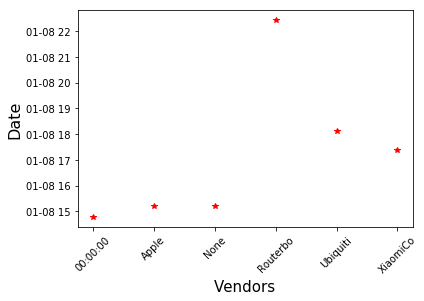

In [18]:
unique_vendors = []
uniques = []
vendors = db_api.fetch_vendors(conn)

for pkt in after_8:
    vendor = db_api.search_mac(vendors,pkt[1])
    if vendor not in unique_vendors:
        unique_vendors.append(vendor)
        uniques.append(pkt)
#adding to a list macs and timestamps for presenting them later  
timestamps = []
vendors_ = []
for pkt in uniques: #assoc_data:
    #print pkt
    vendors_.append( db_api.search_mac(vendors,pkt[1]) )
    timestamps.append(pkt[5])
print set(vendors_)
print "synolikoi vendors",len(vendors_)       
print "monadikoi vendors"

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(timestamps)

ax1.plot(vendors_,date,'r*')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("Vendors",fontsize=15)
plt.ylabel('Date',fontsize=16)
plt.show()

### Clean data from None values. Remove entries with none values in rate and timestamps for plotting to work fine.

samples:  884923 884923
734923 734923
First date of sample:  2018-01-08 22:48:17.926336
Last date of sample:  2018-01-23 19:16:21.897639


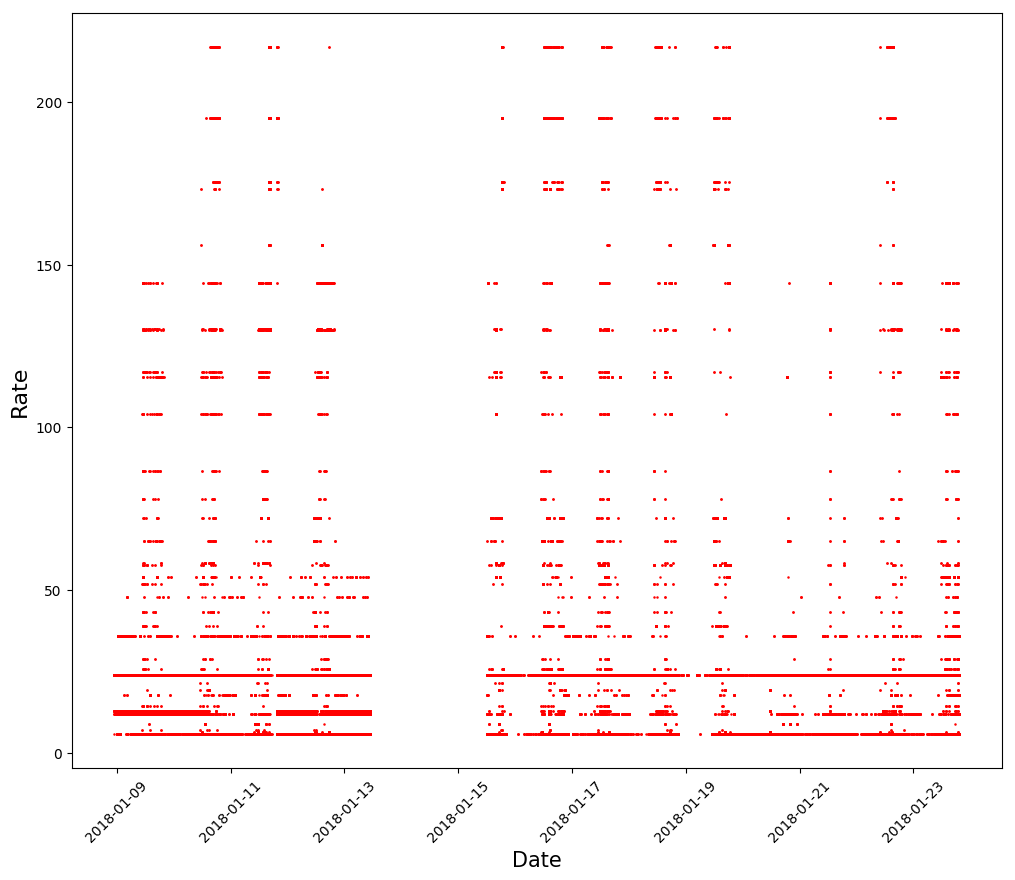

In [21]:
import db_api
DB_FILE = "statistics_server.db"

conn = db_api.create_connection(DB_FILE)
packet_data = db_api.db_fetch_packet_data(conn)

#filters out the old macs
#after_8 = [] #list of packets after 8th of month
#for pkt in packet_data:
#    if int(pkt[3]) > 1515000000 : #unix timestamp after 8th of month
#        after_8.append(pkt)

#Clean our Data from None values in rate and timestamp positions
clean = [x for x in packet_data if (x[4]is not None) and x[7] is not None]
for x in clean:
    if x[4] is None:
        print '    ',x

rate = [x[4] for x in clean]
timestamps= [x[7] for x in clean]
print 'samples: ',len(rate),len(timestamps)

rate = rate[150000:1200000]
timestamps = timestamps[150000:1200000]

print len(rate),len(timestamps)
#plot bar

fig = plt.figure(figsize=(12,10),dpi=100)
ax1 = plt.subplot2grid((1,1), (0,0))
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(timestamps)
print "First date of sample: ",date[0]
print "Last date of sample: ",date[-1]

ax1.plot(date,rate,'ro',markersize=0.8)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel("Date",fontsize=15)
plt.ylabel('Rate',fontsize=16)
plt.show()


### Air time calculation of macs per timeslice.
timeslice is last timestamp - first timestamp. Currently, user has to select the timestamps as Database has no memory
of when and for how long monitor is running. The user can check the timestamps in database and select a set of two, where
between them exists a sequence without time gaps of packets.
Monitor run every 30 secs for 5 seconds all day. Backing up to statistics_server.db takes some more seconds. Eventually monitors runs for 5 secs every ~1 minute. 

set([u'86:42:f8:3d:b7:4c', u'84:42:26:4a:d3:44', u'00:00:00:00:00:00', u'c8:35:4c:e4:5c:4b', u'9c:6e:b3:58:72:82', u'bf:0b:ef:29:e7:54', u'4b:9e:23:48:35:26', u'4c:5e:0c:13:51:3d', u'92:68:3e:39:b7:99', u'ff:20:26:7e:51:3d', u'aa:9a:44:b6:a6:d3', u'4c:5e:0c:5d:9d:2c', u'48:5e:0c:87:2f:cc', u'bf:c5:2c:06:e7:83'])


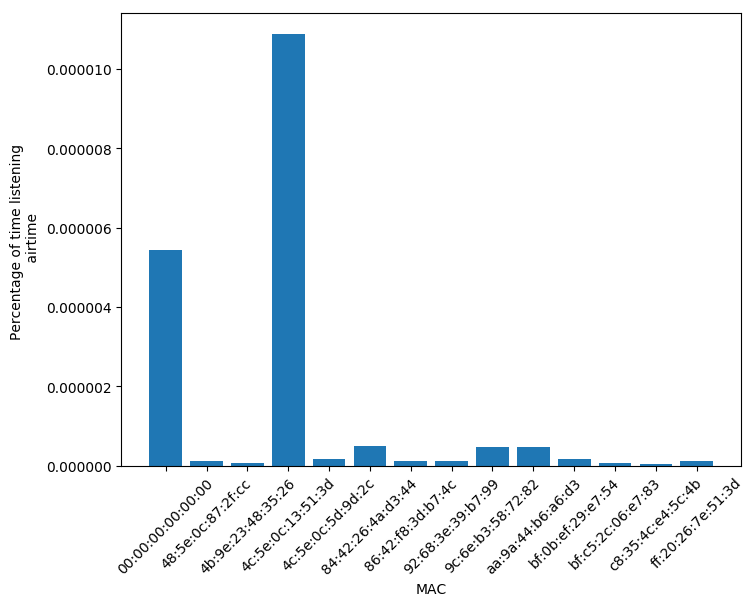

In [36]:
import db_api
DB_FILE = "statistics_server.db"
conn = db_api.create_connection(DB_FILE)

first_tp = 1515618940.84858 #1513351093.62518
last_tp = 1515621587.91529 #1513351096.56654

airtimes = db_api.packet_airtime(conn,first_tp,last_tp)
#print airtimes
#Draw
import matplotlib.pyplot as plt

slices = list(airtimes.values())
#print slices
#slices.append( (last_tp-first_tp) - sum( list(airtimes.values()) ) )
macs = list(airtimes.keys())
#print macs
#macs.append('Unused Time')
#cols = ['c','m']
fig = plt.figure(figsize=(8,6),dpi=100)
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.bar(macs,slices)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.xlabel('MAC')
plt.ylabel('Percentage of time listening \n airtime')
plt.show()